In [4]:
import sys
sys.path.append("../") # go to parent dir to allow imports

In [89]:
from models import mnist_model
from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
labels = [str(x) for x in range(10)]

def show(img):
    """Displays single mnist digit"""
    plt.imshow(img.reshape([28, 28]))
    plt.show()
    
def show_with_var(img, prob, var):
    """Display single mnist digit next to the variance per class"""
    fig, axs = plt.subplots(1, 3, figsize=(10,5))
    axs[0].imshow(img.reshape([28, 28]))
    axs[1].bar(labels, prob)
    axs[2].bar(labels, var)
    plt.show()

In [5]:
n_passes=50
dropout_rate=0.3
learning_rate=1e-4
epochs=20000
display_step=2000

mnist = input_data.read_data_sets("../data/MNIST-data", one_hot=True)

x_data = tf.placeholder(tf.float32, shape=[None, 784])
y_data = tf.placeholder(tf.float32, shape=[None, 10])
dropout_rate_data = tf.placeholder(tf.float32)

logits, class_prob = mnist_model.dropout_cnn_mnist_model(x_data, dropout_rate_data)

loss = tf.losses.softmax_cross_entropy(onehot_labels=y_data, logits=logits)
correct_prediction = tf.equal(tf.argmax(class_prob, 1), tf.argmax(y_data, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

optimizer = tf.train.AdamOptimizer(learning_rate)
train_step = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
sess.run(init)

for epoch in range(epochs):
    batch = mnist.train.next_batch(50)

    sess.run(train_step, feed_dict={x_data: batch[0], y_data: batch[1], dropout_rate_data: 0.5})

    if epoch % display_step == 0:
        print("Epoch {}".format(epoch))
        # cur_loss = sess.run(loss, feed_dict={x_data: batch[0],
        #                                      y_data: batch[1]})
        train_accuracy = sess.run(accuracy, feed_dict={
            x_data: batch[0], y_data: batch[1], dropout_rate_data:0}) # no dropout on single accuracy
        print("Accuracy: {}".format(train_accuracy))

Extracting ../data/MNIST-data/train-images-idx3-ubyte.gz
Extracting ../data/MNIST-data/train-labels-idx1-ubyte.gz
Extracting ../data/MNIST-data/t10k-images-idx3-ubyte.gz
Extracting ../data/MNIST-data/t10k-labels-idx1-ubyte.gz
Epoch 0
Accuracy: 0.199999988079
Epoch 2000
Accuracy: 1.0
Epoch 4000
Accuracy: 1.0
Epoch 6000
Accuracy: 1.0
Epoch 8000
Accuracy: 1.0
Epoch 10000
Accuracy: 1.0
Epoch 12000
Accuracy: 1.0
Epoch 14000
Accuracy: 1.0
Epoch 16000
Accuracy: 1.0
Epoch 18000
Accuracy: 0.960000038147
Accurarcy 0.989999949932
Accurarcy 0.989999949932
Accurarcy 0.980000019073
Accurarcy 0.989999949932
Accurarcy 0.989999949932
Accurarcy 0.990000009537
Accurarcy 0.979999959469
Accurarcy 0.979999959469
Accurarcy 0.959999978542
Accurarcy 1.0


## Evaluation and display wrongly classified

Correct: 2
Predicted: 7


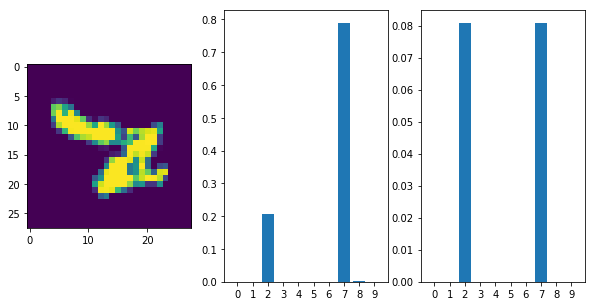

Correct: 9
Predicted: 1


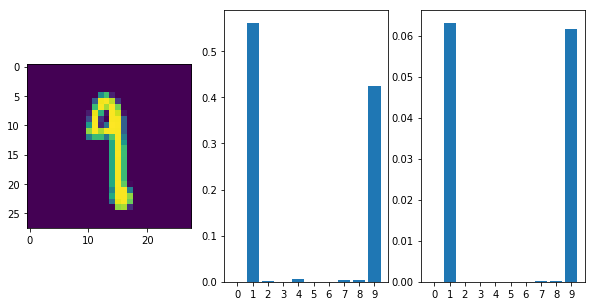

Correct: 8
Predicted: 9


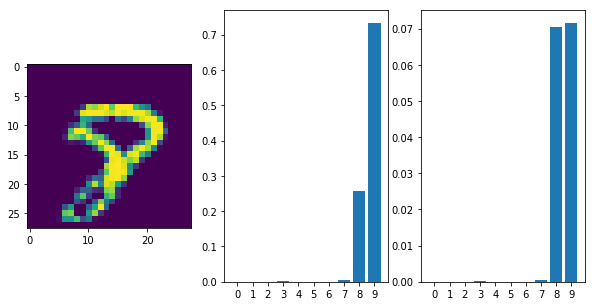

Correct: 5
Predicted: 6


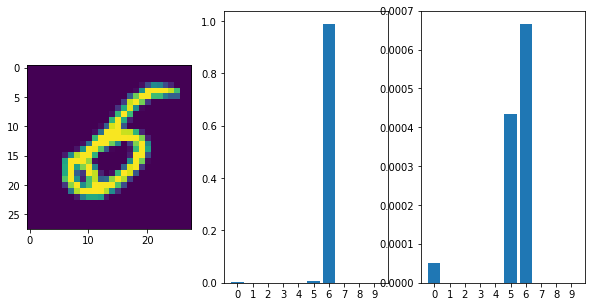

Correct: 7
Predicted: 9


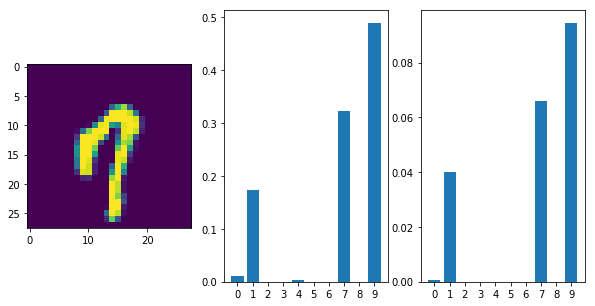

Correct: 5
Predicted: 3


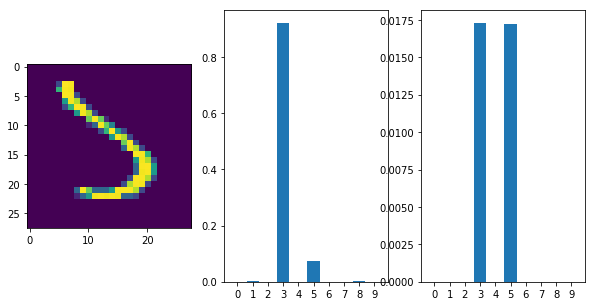

Correct: 9
Predicted: 4


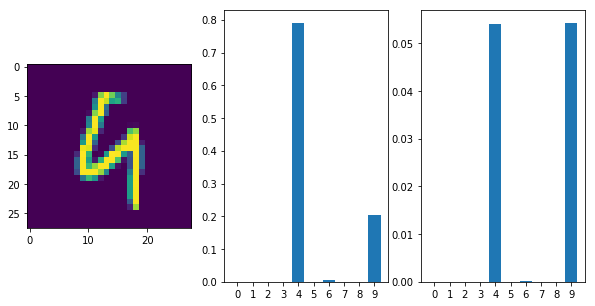

Correct: 7
Predicted: 8


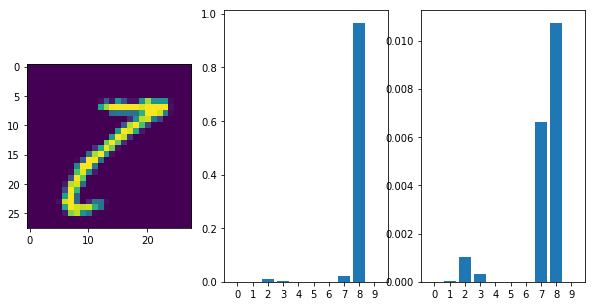

Correct: 8
Predicted: 9


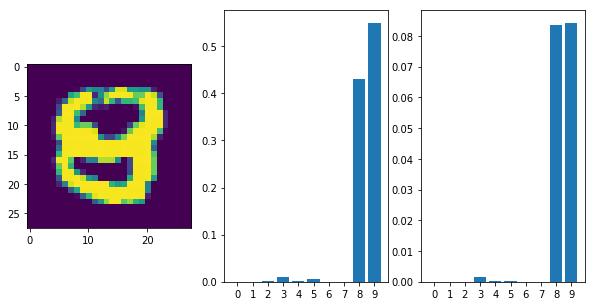

Correct: 6
Predicted: 0


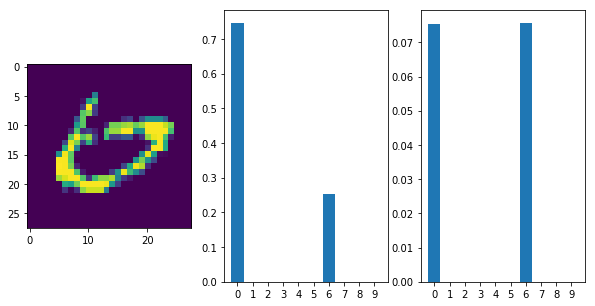

In [90]:
x_test = mnist.test.images
y_test = mnist.test.labels


results = []
for i in xrange(10):
    x_batch, y_batch = mnist.test.next_batch(100)
    # Use tile instead of repeat, because np.repeat flattens results
    x_batch_multipass = np.tile(x_batch, n_passes).reshape(-1, 784)


    pred_y_multipass = sess.run(class_prob, feed_dict={
        x_data: x_batch_multipass, dropout_rate_data: 0.5})

    pred_y_multipass = pred_y_multipass.reshape(-1, n_passes, 10)
    pred_y_mean = pred_y_multipass.mean(axis=1)
    pred_y_var = pred_y_multipass.var(axis=1)

    acc = sess.run(accuracy, feed_dict={
        x_data: x_batch, y_data:y_batch, dropout_rate_data: 0.5})
    
    wrong_idx = np.where(np.equal(np.argmax(y_batch, axis=1), np.argmax(pred_y_mean, axis=1)) == False)[0]
    if len(wrong_idx) > 0:
        for idx in np.nditer(wrong_idx):
            print("Correct: " + str(np.argmax(y_batch[idx])))
            print("Predicted: " + str(np.argmax(pred_y_mean[idx])))
            show_with_var(x_batch[idx], pred_y_mean[idx], pred_y_var[idx])